<a href="https://colab.research.google.com/github/kkostromin/sber_ds/blob/main/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# понадобится для чтения и записи аудио файлов
from scipy.io import wavfile

# это нужно для проигрывания аудио файлов прямо в блокноте
from IPython.display import Audio

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
! wget https://www.dropbox.com/s/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav

--2022-10-19 20:37:47--  https://www.dropbox.com/s/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav [following]
--2022-10-19 20:37:47--  https://www.dropbox.com/s/raw/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7c8e072632cf1857c64952f767.dl.dropboxusercontent.com/cd/0/inline/BvJWoJ_qitkLKVnbQc1ZnyFR5L8iB-sGirGNcLon_IxrYWv3zVFPv5UBOfIi9Gg-sCs0hHvCrOKI8mIFv5vAWV4M3XXAQpkeaORvrO3KnRaNxqBrfgKiMWu63ZPgfNaPHj8tE63TMuo6uEZ9UZgymskZnB6L5A8QAlc6wostq6fBAA/file# [following]
--2022-10-19 20:37:48--  https://uc7c8e072

Выведем частоту дискретизации - она тут стандартная для аудио: 44100 Гц.

NOTE: Частота дискретизации говорит о том, сколько последовательных элементов массива с сигналом кодируют звук длительностью 1 секунда.

Подробнее о кодировании звука тут.

In [ ]:
samplerate, data = wavfile.read('Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav')

In [ ]:
print(samplerate)

44100


In [ ]:
# Если поделить длину массива сигнала на samplerate, получится длительность аудиодорожки в секундах

print(len(data) / samplerate)

# 45 секунд - похоже на правду:)

45.139591836734695


In [ ]:
# Заметим, что звук - стерео, так как сигнал кодируется двумя каналами (для левого и правого динамика):

print(data.shape)

(1990656, 2)


In [ ]:
data

array([[ 0,  0],
       [-1, -1],
       [-1, -1],
       ...,
       [ 0,  0],
       [ 0,  0],
       [ 0,  0]], dtype=int16)

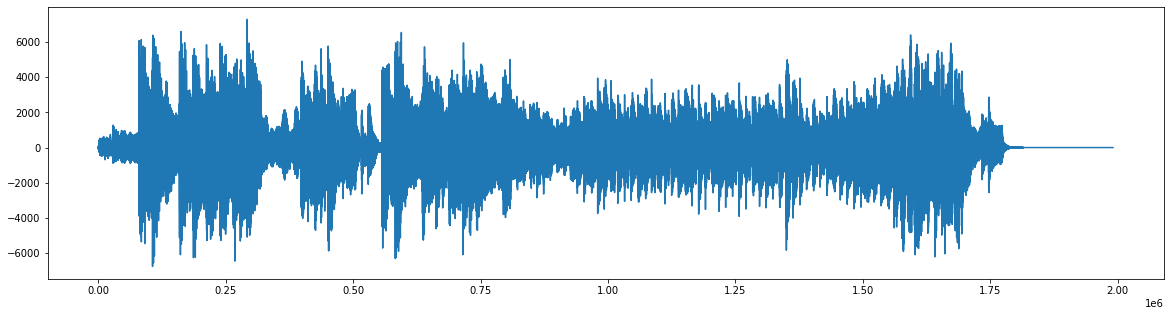

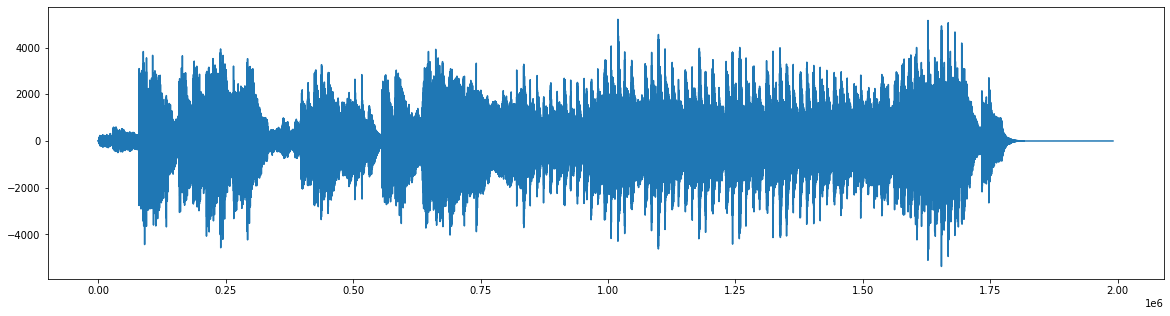

In [ ]:
# Отрисуем сигналы в обоих каналах

# Канал 1
plt.figure(figsize=(20,5))
plt.plot(data[:,0])
plt.show()

# Канал 2
plt.figure(figsize=(20,5))
plt.plot(data[:,1])
plt.show()

In [ ]:
# Усредним каналы, и получим моно звук, с которым будет проще работать

mono_sound = np.mean(data, axis=1)
print(mono_sound.shape)

(1990656,)


In [ ]:
mono_sound

array([ 0., -1., -1., ...,  0.,  0.,  0.])

In [ ]:
# Давайте послушаем наконец, что же мы будем сжимать:)

Audio(mono_sound, rate = samplerate)

In [ ]:
# Для удобства - обрежем массив с сигналом так, чтобы его было удобнее делить на равные части, 
# датасет из которых и необходимо будет сжать известными вам методами.
# На самом деле способ очень похож на тот, которым мы сжимали картинку, деля её на прямоугольные подкартинки)

mono_sound_to_cut = mono_sound[:1990000]

Задание 1: Разделите сигнал на равные части (длину каждой части возьмите равной 1000).

Соберите из них "датасет", который будет представим в виде двуменого массива - "матрицы". (каждая часть длины 1000 -- одна строка)

Напишите функцию, которая будет переводить вашу "матрицу" обратно в звуковой сигнал. Проверьте что все работает, путем воспроизведения востановленного сигнала.

Подсказка: Вспомните про метод .reshape()

In [ ]:
mono_sound_to_cut.shape


(1990000,)

In [ ]:
# разбиваем наш файл на датасет размером 1990х1000
sound_df = pd.DataFrame(mono_sound_to_cut.reshape((len(mono_sound_to_cut) // 1000),1000))

In [ ]:
sound_df 

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,118.5,129.0,142.0,152.0,149.0,133.0,111.5,88.5,58.5,18.0
1,-25.5,-61.5,-81.5,-88.5,-83.5,-70.0,-53.0,-37.5,-28.0,-28.5,...,276.5,302.0,301.5,272.5,219.5,155.0,90.5,30.5,-20.5,-53.0
2,-67.5,-65.5,-50.0,-30.5,-22.5,-34.5,-59.5,-88.0,-109.5,-111.5,...,136.5,72.5,44.5,49.5,58.5,69.0,93.5,118.5,118.5,86.5
3,31.0,-36.0,-98.5,-137.5,-135.5,-89.0,-12.5,65.0,109.5,100.0,...,23.5,64.5,86.5,84.5,70.5,63.5,70.0,74.0,64.0,43.5
4,19.5,-11.0,-49.0,-88.5,-121.5,-141.5,-141.5,-116.5,-72.0,-25.0,...,-168.5,-170.5,-157.5,-141.5,-129.5,-121.5,-119.0,-120.5,-124.0,-120.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# функция преобразования датасета в звуковой сигнал
def matrix_to_array(df):
    # преобразовываем в np_array наш датасет
    sound_np_array = sound_df.values
    # объявляем пустой массив
    sound_array = []
    # в цикле записываем в массив данные из np_array
    for l in sound_np_array:
        sound_array.extend(l)
    # возращаем массив "звука"
    return sound_array

In [ ]:
# Проверяем работу нашей функция по обратному преобразованию
Audio(matrix_to_array(sound_df), rate = samplerate)

Задание 2 Выполните PCA преобразование, и получите данные, сжатые в пространство меньшей размерности

Постройте сами две главные компоненты в наглядной форме. Сделайте выводы исходя из их вида.

Постройте scatter plot датасета в просрансве первых двух компонент, а третью используйте как цвет

Подсказка: код этого пункта практически полностью совпадает с кодом, который мы использовали на семинаре.

In [ ]:
#стандартизация набора данных
sound_df_scaled = StandardScaler().fit_transform(sound_df)
sound_df_scaled[:5]

array([[ 0.02014774,  0.02030701,  0.02295695, ...,  0.14295222,
         0.1016046 ,  0.04473225],
       [-0.01675258, -0.06723463, -0.09349247, ...,  0.05949157,
        -0.01240379, -0.05795707],
       [-0.07752957, -0.07302251, -0.0479253 , ...,  0.18612153,
         0.18819324,  0.14380576],
       [ 0.06500695, -0.03033691, -0.11808427, ...,  0.12208706,
         0.10954189,  0.08161363],
       [ 0.04836563,  0.00583732, -0.04647873, ..., -0.15779393,
        -0.1617692 , -0.15558425]])

In [ ]:
# оставляем первые две главные компоненты 
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(sound_df_scaled)

In [ ]:
#посмотрим размерность
print("Форма исходного массива: {}".format(str(sound_df.shape)))
print("Форма массива после сокращения размерности: {}".format(str(principalComponents.shape)))

Форма исходного массива: (1990, 1000)
Форма массива после сокращения размерности: (1990, 3)


In [ ]:
pca.components_

array([[ 0.00033028,  0.00132822,  0.00239625, ...,  0.0333576 ,
         0.03133324,  0.0293645 ],
       [-0.05797014, -0.0598152 , -0.06161439, ...,  0.04655432,
         0.0455186 ,  0.04440506],
       [ 0.00777182,  0.00776902,  0.00773351, ...,  0.01850838,
         0.02028343,  0.02182667]])

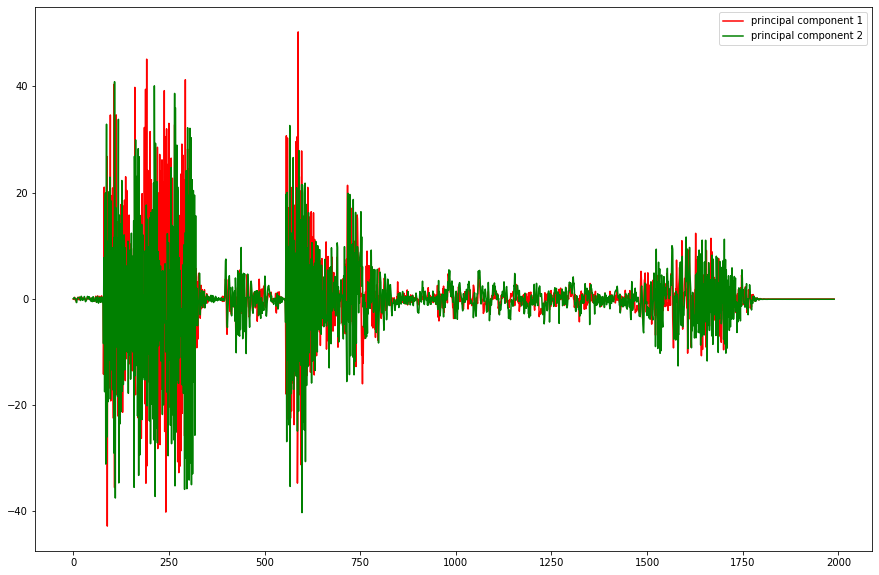

In [ ]:
#две главные компоненты в наглядной форме
plt.rcParams['figure.figsize'] = (15, 10)
plt.plot(principalComponents[:,0],color="red")
plt.plot(principalComponents[:,1],color="green")
plt.legend(['principal component 1', 'principal component 2'])

Вывод: Мы видим на графике, что наши главные компоненты "повторяют" график звукового сигнала исследуемого файла, но в меньшей размерности. Т.е. метод главных компонент позволяте сжать звуковой сигнал, что подтверждает график. 

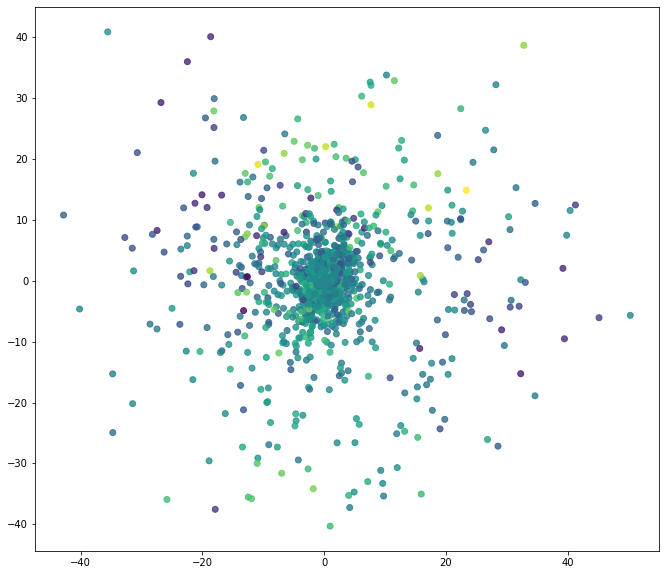

In [ ]:
# scatter plot датасета в просрансве первых двух компонент, 3 компонента - цвет 
plt.rcParams['figure.figsize'] = (14, 10)
plt.scatter(principalComponents[:,0],principalComponents[:,1],c = principalComponents[:,2],alpha=0.8)
plt.gca().set_aspect("equal")

Задание 3 Выполните обратное PCA преобразование сжатых данных и получите "матрицу" с сжатым звуком

Преобразуйте "матрицу" в сигнал (одномерный массив), и послушайте результат (Audio(YOUR_RESULT, rate = samplerate)

In [ ]:
sound_df_hat = pca.inverse_transform(principalComponents)

In [ ]:
sound_df_hat

array([[ 3.53302235e-04,  3.25073952e-04,  2.94108928e-04, ...,
        -2.97992600e-03, -2.93804769e-03, -2.88862275e-03],
       [-3.03326073e-03, -3.24058648e-03, -3.45363391e-03, ...,
        -4.60868669e-04, -2.57756897e-04, -7.09143835e-05],
       [-1.21499557e-02, -1.26246477e-02, -1.30968390e-02, ...,
         9.98249550e-03,  1.00549504e-02,  1.00840747e-02],
       ...,
       [ 5.91070321e-03,  6.04462876e-03,  6.16972860e-03, ...,
        -5.49631162e-03, -5.24231399e-03, -4.99092910e-03],
       [ 5.91070321e-03,  6.04462876e-03,  6.16972860e-03, ...,
        -5.49631162e-03, -5.24231399e-03, -4.99092910e-03],
       [ 5.91070321e-03,  6.04462876e-03,  6.16972860e-03, ...,
        -5.49631162e-03, -5.24231399e-03, -4.99092910e-03]])

In [ ]:
sound_df_hat.shape

(1990, 1000)

In [ ]:
Audio(matrix_to_array(sound_df_hat), rate = samplerate)